In [122]:
""" Ce script analyse les transactions dans le contexte des cartes prépayées d'une chaîne de restauration rapide. 
Il inclut des analyses de tendances, des détections d'anomalies, des performances des caissiers, et la corrélation 
entre les soldes des cartes et les dépenses des clients. Les résultats sont visualisés à l'aide de divers graphiques 
pour faciliter l'interprétation des données et fournir des insights exploitables. """

" Ce script analyse les transactions dans le contexte des cartes prépayées d'une chaîne de restauration rapide. \nIl inclut des analyses de tendances, des détections d'anomalies, des performances des caissiers, et la corrélation \nentre les soldes des cartes et les dépenses des clients. Les résultats sont visualisés à l'aide de divers graphiques \npour faciliter l'interprétation des données et fournir des insights exploitables. "

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import datetime as dt

# Introduction : **Data Loading**

In [7]:
# Load CSV data
df = pd.read_csv(r'REGLEMENTS_CARTES_PREPAYEES_FAST_FOOD - modified_three_words_REGLEMENTS.csv')

# Display the first few rows
df.head(7)

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22
5,286068,700876410,2024-02-27,08:16:08,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,CHAOUNI BENABDALLAH,961.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-27
6,286072,700876413,2024-02-27,08:17:21,Carte prépayée,NaN,12.0,12.0,0.0,CLT10001,...,ZAZARI,185.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-27


In [8]:
# some informations about the data we're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Règlement      15222 non-null  int64  
 1   ID_Operation      15222 non-null  int64  
 2   Date_Règlement    15222 non-null  object 
 3   Heure_Règlement   15222 non-null  object 
 4   Paiement          15222 non-null  object 
 5   Référence         99 non-null     float64
 6   Montant_Rgl       15222 non-null  float64
 7   Montant_Versé     15222 non-null  float64
 8   Montant_Rst       15222 non-null  float64
 9   ID_Client         10690 non-null  object 
 10  Client            10690 non-null  object 
 11  ID_CartePP        15222 non-null  object 
 12  Bénéficiaire_CPP  14668 non-null  object 
 13  Solde_CPP         15222 non-null  float64
 14  ID_Restaurant     15222 non-null  object 
 15  Restaurant        15222 non-null  object 
 16  ID_User           15221 non-null  object

In [9]:
# Checking uniqueness of ID columns
id_columns = ['ID_Règlement', 'ID_Operation', 'ID_Client', 'ID_CartePP', 'ID_Restaurant', 'ID_User']
unique_counts = {col: df[col].nunique() for col in id_columns}
unique_counts

{'ID_Règlement': 15222,
 'ID_Operation': 15222,
 'ID_Client': 2,
 'ID_CartePP': 1007,
 'ID_Restaurant': 7,
 'ID_User': 13}

In [10]:
# Using describe to summarize numerical columns
data_description = df.describe()
data_description

,ID_Règlement,ID_Operation,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,Solde_CPP
count,15222.000000,1.522200e+04,9.900000e+01,15222.000000,15222.000000,1.522200e+04,15222.000000
mean,304552.634673,6.415931e+08,5.541115e+15,33.954553,33.954553,-1.406516e-08,580.855540
std,38098.097638,1.482726e+08,3.240446e+15,59.042239,59.042240,1.320466e-06,592.877436
min,250355.000000,2.019016e+08,5.850000e+02,1.500000,1.500000,-9.918212e-05,1.500000
25%,271202.750000,5.005158e+08,2.759346e+15,10.000000,10.000000,0.000000e+00,100.000000
50%,299481.500000,7.008713e+08,4.293358e+15,24.000000,24.000000,0.000000e+00,330.000000
75%,334226.750000,7.008972e+08,9.432400e+15,45.000000,45.000000,0.000000e+00,960.875000
max,388034.000000,9.061058e+08,9.942445e+15,2799.527996,2799.528076,5.340576e-05,6000.000000


In [11]:
# Convert 'Date_Règlement' with strict format
df['Date_Règlement'] = pd.to_datetime(df['Date_Règlement'], format='%Y-%m-%d', errors='coerce')

# Convert 'Heure_Règlement' with strict format
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S', errors='coerce')
df['hour'] = df['Heure_Règlement'].dt.hour
df

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys,hour
0,287967,700877295,2024-02-29,1900-01-01 08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,8
1,287983,700877305,2024-02-29,1900-01-01 08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,8
2,287994,700877312,2024-02-29,1900-01-01 08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29,8
3,282957,700874995,2024-02-22,1900-01-01 11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22,11
4,282972,700874999,2024-02-22,1900-01-01 11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217,387932,700915710,2024-09-04,1900-01-01 10:10:28,Carte prépayée,NaN,7.0,7.0,0.0,CLT10001,...,1453.55,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-09-04,10
15218,387944,700915716,2024-09-04,1900-01-01 10:20:13,Carte prépayée,NaN,35.0,35.0,0.0,CLT10001,...,6000.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-09-04,10
15219,387991,700915730,2024-09-04,1900-01-01 10:52:03,Carte prépayée,NaN,54.0,54.0,0.0,CLT10001,...,59.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-09-04,10
15220,388014,906105768,2024-09-04,1900-01-01 11:16:27,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,66.00,RST10014,Epicerie - Rabat,USR10029,Moncef,Caissier,Validé,False,2024-09-04,11


# **Analysis** _&_ **Visualizations**

Ce script effectue les analyses suivantes :

1. **Analyse des Tendances des Transactions** : Analyser les montants de transactions par jour, semaine et mois.

In [13]:
# Group 'Montant_rgl' by day
daily_trends = df.groupby(df['Date_Règlement'].dt.date)['Montant_Rgl'].sum().reset_index()
# Group 'Montant_rgl' by week
weekly_trends = df.groupby(df['Date_Règlement'].dt.to_period('W'))['Montant_Rgl'].sum().reset_index()
weekly_trends['Date'] = weekly_trends['Date_Règlement'].dt.start_time  # Convert period to start of week datetime# Group by week
# Group 'Montant_rgl' by month
monthly_trends = df.groupby(df['Date_Règlement'].dt.to_period('M'))['Montant_Rgl'].sum().reset_index()
monthly_trends['Date'] = monthly_trends['Date_Règlement'].dt.start_time # Convert period to start of week datetime# Group by month
monthly_trends

,Date_Règlement,Montant_Rgl,Date
0,2024-01,88552.516991,2024-01-01
1,2024-02,89719.960037,2024-02-01
2,2024-03,66291.826827,2024-03-01
3,2024-04,51492.081983,2024-04-01
4,2024-05,102934.501750,2024-05-01
5,2024-06,78728.774981,2024-06-01
6,2024-07,13531.747995,2024-07-01
7,2024-08,18340.800014,2024-08-01
8,2024-09,7263.990002,2024-09-01


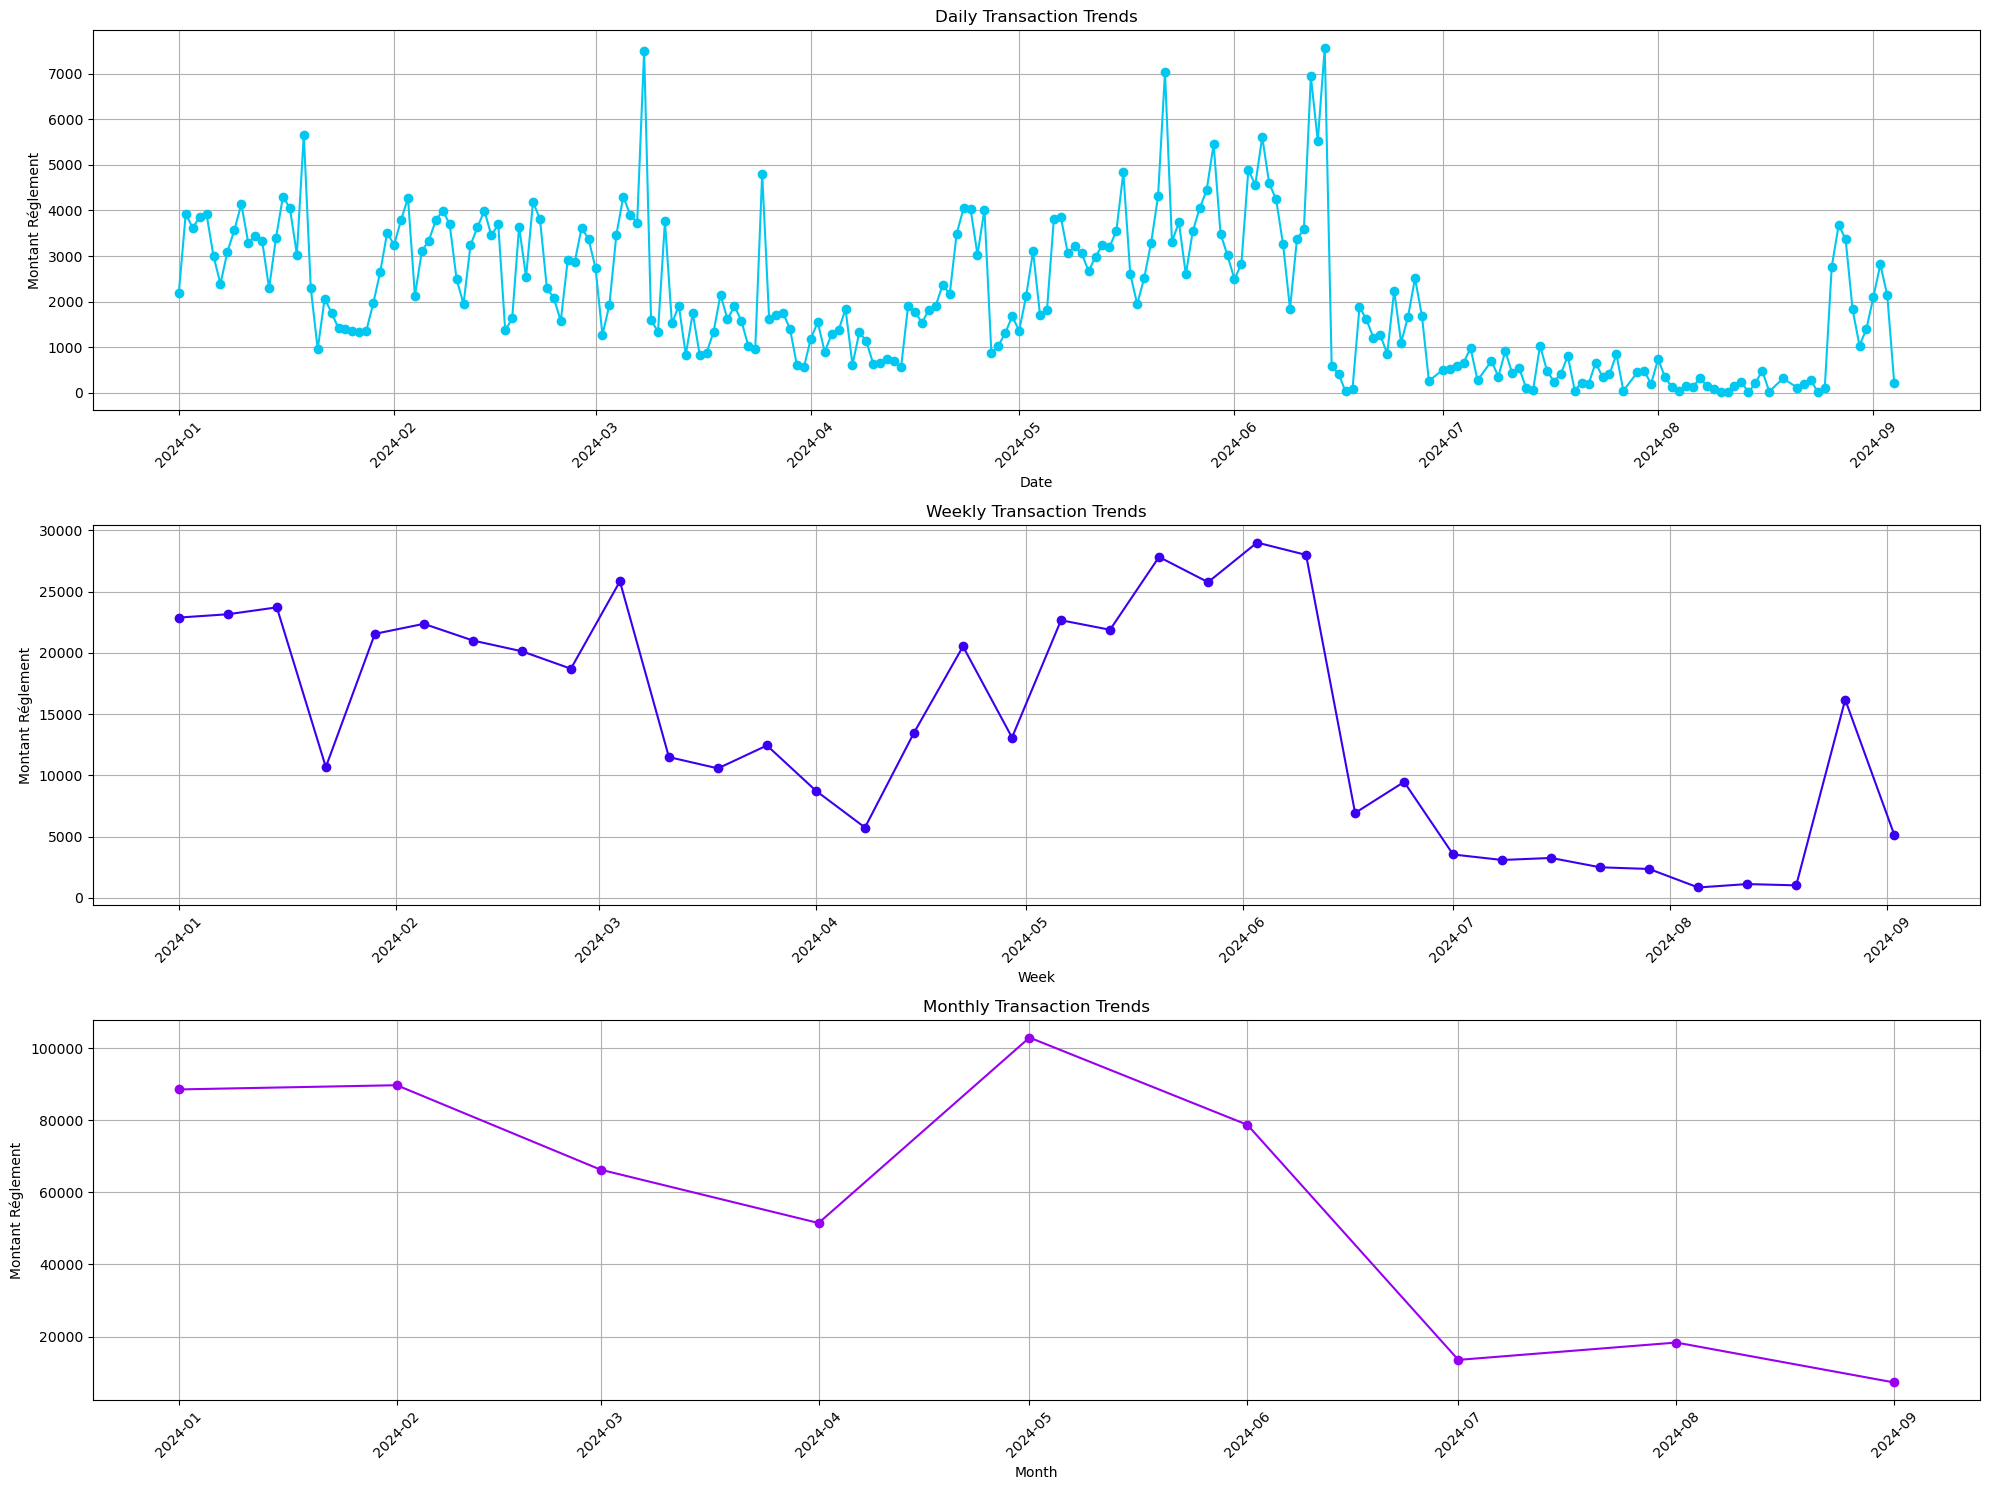

In [92]:
# Create subplots: 3 rows and 1 column (for daily, weekly, and monthly trends)
fig, axs = plt.subplots(3, 1, figsize=(20, 15))  # 3 rows, 1 column
plt.subplots_adjust(hspace=0.6)  # Increase wspace to add space between subplots

# First Subplot: Daily Trends ----
axs[0].plot(daily_trends['Date_Règlement'], daily_trends['Montant_Rgl'], marker='o', linestyle='-', color='#00c8f0')
axs[0].set_title('Daily Transaction Trends')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Montant Réglement')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid()
# second subplot: Weekly Trends
axs[1].plot(weekly_trends['Date'], weekly_trends['Montant_Rgl'], marker='o', linestyle='-', color='#3c00f0')
axs[1].set_title('Weekly Transaction Trends')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Montant Réglement')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid()

# third subplot : Monthly Trends
axs[2].plot(monthly_trends['Date'], monthly_trends['Montant_Rgl'], marker='o', linestyle='-', color='#9800f0')
axs[2].set_title('Monthly Transaction Trends')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Montant Réglement')
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid()
plt.tight_layout()  # Automatically adjust layout
# Show the plot
plt.show()

### 1. **Analyse des Tendances des Transactions**

- **Graphiques Linéaires** : Représente les montants de transactions (`Montant_Rgl`) par jour, semaine et mois.

#### **Interprétation** :

- **Points Élevés** : Une tendance à la hausse des ventes pourrait refléter l'efficacité des campagnes de marketing, l'introduction de nouveaux produits, ou une augmentation de la clientèle.
- **Points Bas** : En revanche, les baisses de ventes peuvent signaler des problèmes à adresser, tels que la nécessité d'améliorer l'approvisionnement, de renforcer le marketing pendant les périodes creuses ou de mieux comprendre le comportement des consommateurs.

#### **Insight** :

**Prévoir** : Anticiper les périodes de forte et de faible activité pour mieux planifier les besoins en personnel et en approvisionnement.

**Adapter** : Élaborer des stratégies marketing ciblées pour stimuler les ventes pendant les périodes creuses (par exemple, promotions ou 
campagnes publicitaires) afin de maximiser les opportunités de vente tout au long de l'année.

**Évaluer** : Comprendre les raisons des points bas pour apporter des améliorations concrètes, que ce soit par l'amélioration de l'expérience client, la diversification des produits ou des ajustements de prix.

2. **Analyse des Tendances d'Utilisation des Cartes Prépayées** : Observer les tendances des soldes des cartes prépayées dans le temps.

In [16]:
# group solde_cpp by date
daily_balance_trends = df.groupby(df['Date_Règlement'].dt.date)['Solde_CPP'].mean().reset_index()
daily_balance_trends.columns = ['Date', 'Average_Solde_CPP']
daily_balance_trends.head()

,Date,Average_Solde_CPP
0,2024-01-01,439.178961
1,2024-01-02,440.285789
2,2024-01-03,540.354962
3,2024-01-04,403.749808
4,2024-01-05,478.238156


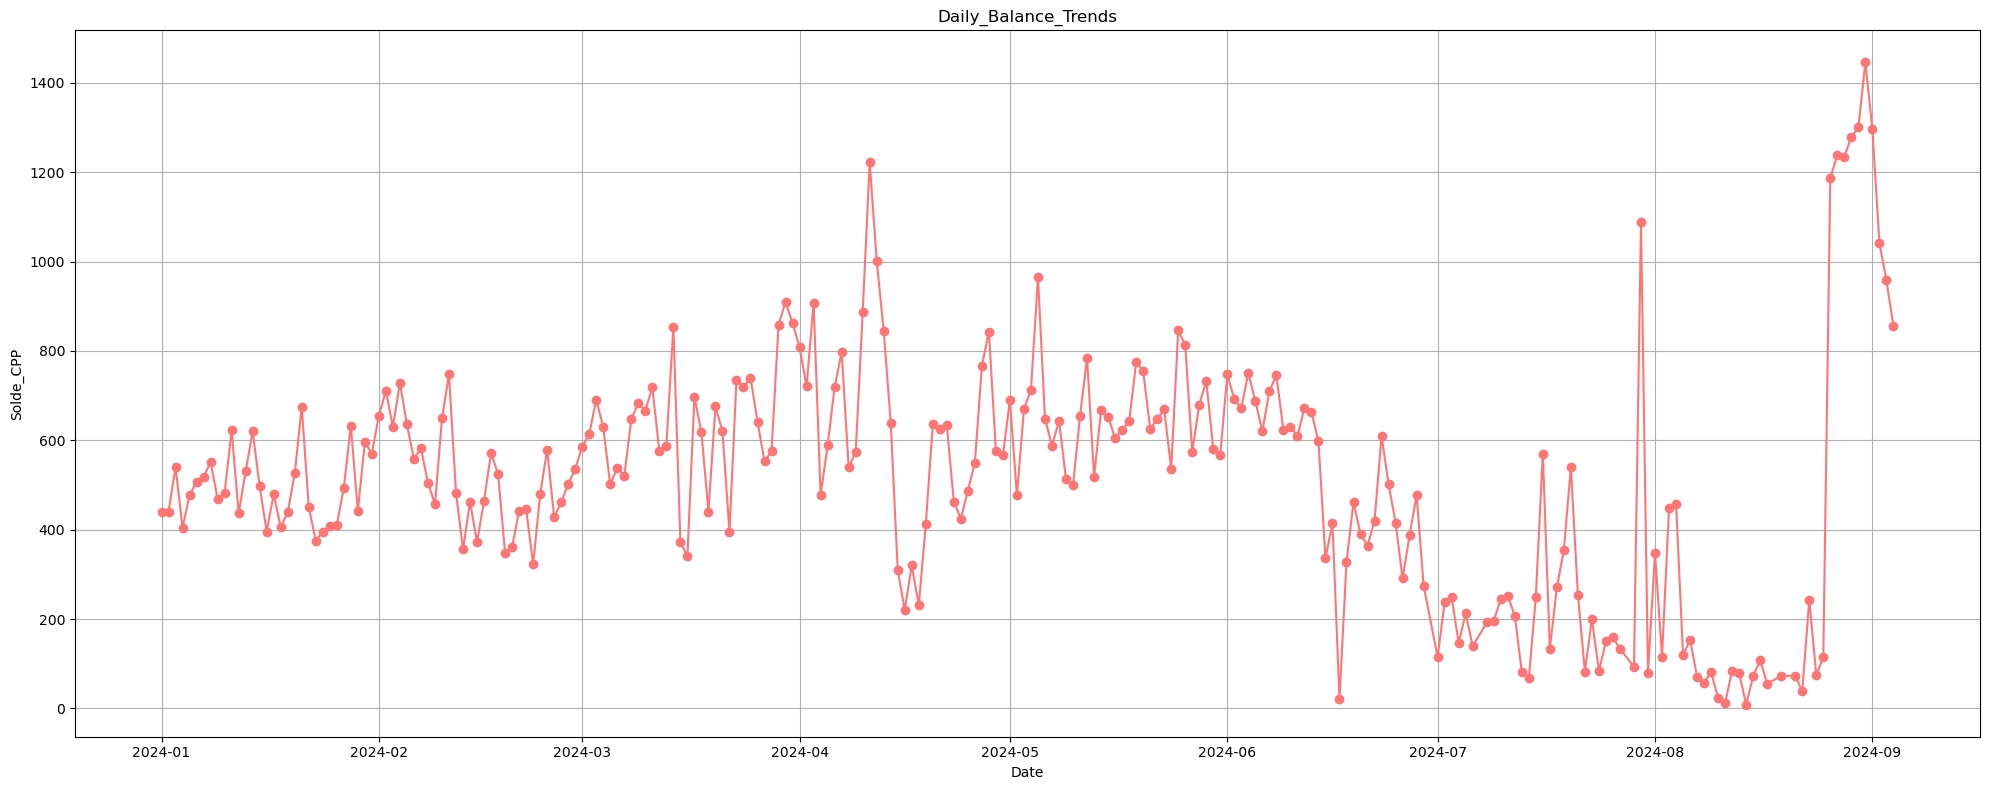

In [118]:
# Plotting the daily balance trends
plt.figure(figsize=(20, 8))
plt.plot(daily_balance_trends['Date'], daily_balance_trends['Average_Solde_CPP'], marker='o', linestyle='-', color='#ff7575')
plt.xlabel('Date')
plt.ylabel('Solde_CPP')
plt.title('Daily_Balance_Trends')
plt.grid()
plt.tight_layout()
plt.show()

# Analyse des Tendances des Soldes des Cartes Prépayées

- **Graphiques Linéaires** : Visualisation des soldes moyens des cartes prépayées (`Solde_CPP`) au fil du temps, en groupant les données par date.

## Interprétation :

- **Points Élevés** : Une tendance à la hausse des soldes pourrait indiquer une adoption croissante des cartes prépayées, alimentée par des initiatives marketing réussies ou une demande accrue dans le secteur de la restauration rapide.

- **Points Bas** : Des baisses notables pourraient nécessiter des ajustements dans les stratégies marketing ou une réévaluation des offres de produits pour maintenir l'intérêt des clients.

## Insight :

- En analysant ces tendances, l'entreprise peut :
    - **Anticiper** : Prévoir les fluctuations des soldes pour optimiser la gestion de trésorerie et les besoins en approvisionnement.
   
    - **Adapter** : Mettre en place des campagnes de marketing ciblées pour encourager l'utilisation des cartes prépayées pendant les périodes de faibles soldes.
   
    - **Évaluer** : Identifier les raisons derrière les baisses et proposer des améliorations, telles que l'enrichissement de l'expérience client ou l'introduction de nouveaux avantages pour les utilisateurs de cartes prépayées.

3. **Analyse du Comportement des Clients** : Identifier les plus gros dépensiers et analyser leur comportement d'achat.

In [19]:
# Data cleaning 'Bénéficiaire_CPP' column: Replace empty strings and numeric entries with 'Unknown'
df['Bénéficiaire_CPP'] = df['Bénéficiaire_CPP'].replace(to_replace=r'^\s*$', value='Unknown', regex=True)  # Replace empty strings
df['Bénéficiaire_CPP'] = df['Bénéficiaire_CPP'].replace(to_replace=r'^[0-9]+$', value='Unknown', regex=True)  # Replace numeric entrie# 1. Identify the top spenders by total amount spent
# Replace NaN values with 'Unknown' by assigning the result back to the column
df['Bénéficiaire_CPP'] = df['Bénéficiaire_CPP'].fillna('Unknown')
df['Bénéficiaire_CPP'].head(30)

0                 MOUMOUN
1                 FARAIDI
2           RACHIDI Salah
3                EL AZRAK
4                ZERIOUEL
5     CHAOUNI BENABDALLAH
6                  ZAZARI
7     CHAOUNI BENABDALLAH
8                  MAARIF
9              EZ-ZAARATE
10                 CHADEL
11                  AAYLA
12                     EL
13                RAMDANI
14                 AGOUMI
15            ALAMI OUALI
16               EL AOUNI
17             NAIT YAZZA
18           EL MOUNTADAR
19                BOUDOUH
20              EL AZHARI
21               ELAZHARI
22            BOUICHENADE
23               AIT MAHA
24                Unknown
25                TOUZANI
26             EZ-ZAARATE
27                BASSALH
28                Unknown
29                  FADEL
Name: Bénéficiaire_CPP, dtype: object

In [20]:
# 1. Identify the top spenders by total amount spent
total_spent = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index()
total_spent.columns = ['Nom_User', 'Total_Dépensé']
top_spenders = total_spent.nlargest(10, 'Total_Dépensé')
top_spenders.head()

,Nom_User,Total_Dépensé
735,RIFAI,17737.572536
796,Unknown,17650.043995
230,CHAGH,12992.532396
764,SELMANI,12726.843949
192,BOUICHENADE,11338.000000


In [21]:
# 2. Calculate average spending per transaction for each client
average_spending = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].mean().reset_index()
average_spending.columns = ['Nom_User', 'Dépense_Moyenne']
top_average_spenders = average_spending.nlargest(10, 'Dépense_Moyenne')
average_spending.head()

,Nom_User,Dépense_Moyenne
0,AABID,25.950000
1,AABIL,51.361818
2,AARAB,42.886905
3,AARIBECHE,3.111111
4,AAYLA,23.078125


In [22]:
# 3. Analyze average prepaid card balance for the top spenders
average_balance = df.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index()
average_balance.columns = ['Nom_User', 'Solde_Moyen_CPP']
top_balance_spenders = average_balance.nlargest(10, 'Solde_Moyen_CPP')
average_balance.head()

,Nom_User,Solde_Moyen_CPP
0,AABID,72.900000
1,AABIL,1055.187273
2,AARAB,848.883929
3,AARIBECHE,14.500000
4,AAYLA,114.261250


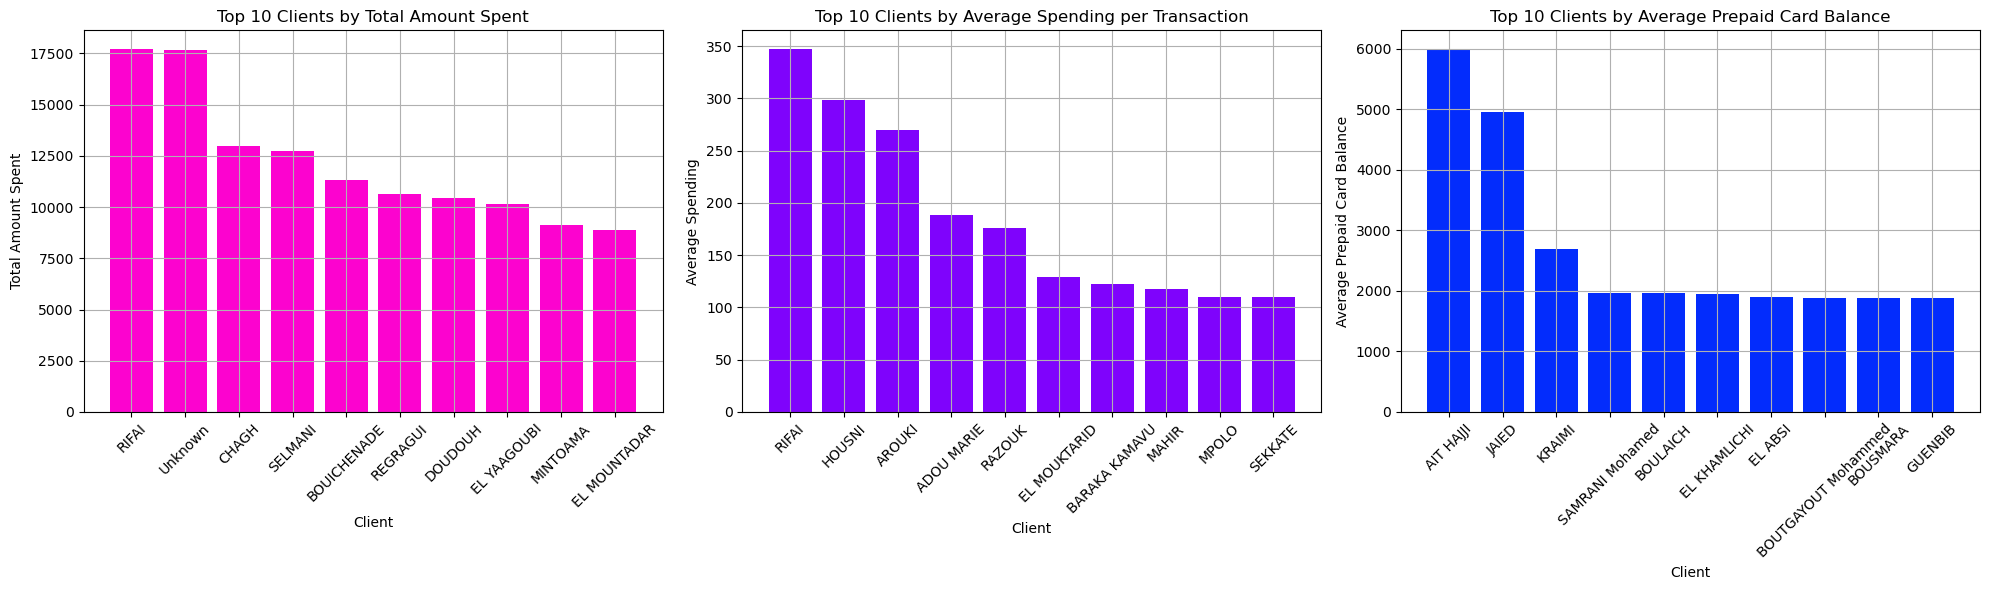

In [23]:
# Plotting with subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# 1. Bar chart for the top 10 clients by total amount spent
axs[0].bar(top_spenders['Nom_User'], top_spenders['Total_Dépensé'], color='#fc03cf')
axs[0].set_title('Top 10 Clients by Total Amount Spent')
axs[0].set_xlabel('Client')
axs[0].set_ylabel('Total Amount Spent')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid()

# 2. Bar chart for the top 10 clients by average spending per transaction
axs[1].bar(top_average_spenders['Nom_User'], top_average_spenders['Dépense_Moyenne'], color='#7f03fc')
axs[1].set_title('Top 10 Clients by Average Spending per Transaction')
axs[1].set_xlabel('Client')
axs[1].set_ylabel('Average Spending')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid()

# 3. Bar chart for the top 10 clients by average prepaid card balance
axs[2].bar(top_balance_spenders['Nom_User'], top_balance_spenders['Solde_Moyen_CPP'], color='#032cfc')
axs[2].set_title('Top 10 Clients by Average Prepaid Card Balance')
axs[2].set_xlabel('Client')
axs[2].set_ylabel('Average Prepaid Card Balance')
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Analyse du Comportement des Clients

- **Graphiques en Barres** : Représente les clients les plus dépensiers et leurs habitudes de transaction.

## Interprétation :

- **Top Clients** : Les clients les plus dépensiers représentent une opportunité majeure de fidélisation et de ventes supplémentaires via des offres personnalisées.

- **Dépense Moyenne** : Les clients à dépense moyenne élevée sont des cibles idéales pour des produits ou services premium.

- **Solde Prépayé** : Encourager ces clients à continuer de recharger leurs cartes via des avantages exclusifs pourrait solidifier leur engagement à long terme.

## Insight :

- **Programmes de Fidélisation** : Créer des offres ou programmes VIP pour les plus gros dépensiers afin de maximiser la valeur des transactions et renforcer leur loyauté.

- **Segmentation** : La segmentation des clients en fonction de leur dépense moyenne peut permettre de mieux cibler les promotions, notamment pour ceux qui montrent un fort potentiel pour des offres premium.

4. **Analyse des Montants Restants et des Soldes à Zéro** : Identifier les clients avec des montants impayés et des soldes de carte à zéro.

In [25]:
# Filter for unpaid amounts
unpaid_amounts = df[df['Montant_Rst'] > 0]
# Group by client and sum unpaid amounts
unpaid_by_client = unpaid_amounts.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().reset_index()
unpaid_by_client.columns = ['Client', 'Montant_Restant_à_Payer']
# Sort by unpaid amounts in descending order
unpaid_by_client = unpaid_by_client.sort_values(by='Montant_Restant_à_Payer', ascending=False)
unpaid_by_client.head(10)

,Client,Montant_Restant_à_Payer
24,RIFAI,7.629394e-05
27,SELMANI,4.482269e-05
23,REGRAGUI,2.288818e-05
28,Unknown,3.814697e-06
16,HOUSNI,2.145767e-06
26,SEGBEDJI Yao,1.907349e-06
13,EL YAAGOUBI,1.907349e-06
5,CHAGH,1.907349e-06
8,DOUDOUH,1.907349e-06
18,KADIRI Lalla,9.536743e-07


In [26]:
# Filter for clients with zero prepaid card balances
zero_balance_clients = df[df['Solde_CPP'] == 0]
# Group by client and count transactions or sum unpaid amounts
zero_balance_count = zero_balance_clients.groupby('Bénéficiaire_CPP').size().reset_index()
zero_balance_count.columns = ['Client', 'Count']
zero_balance_count.head()

,Client,Count


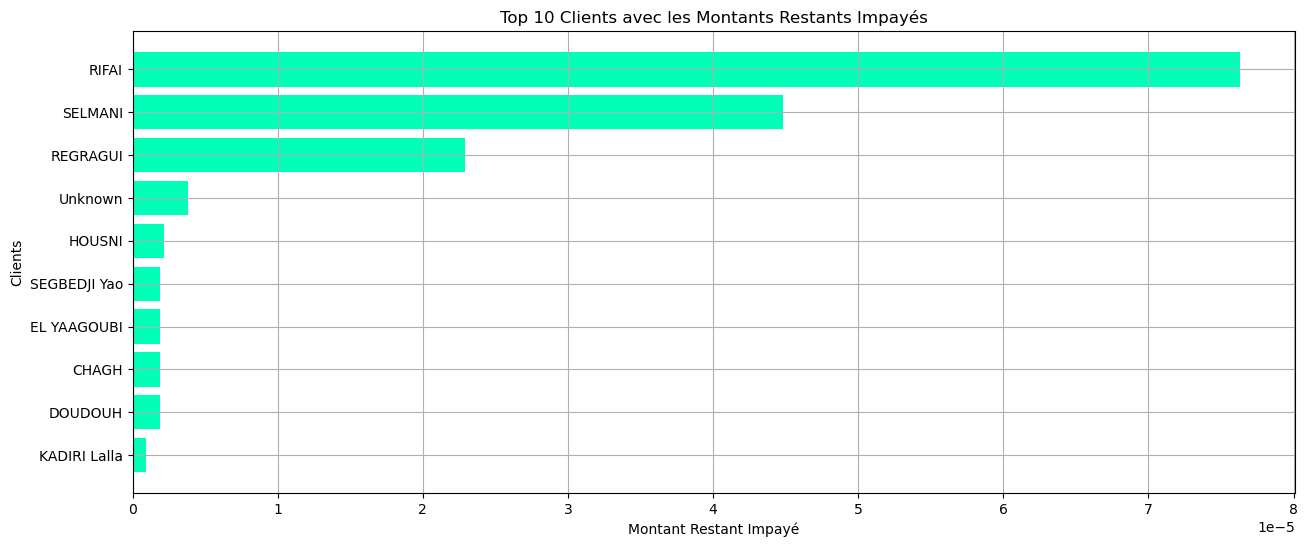

In [129]:
# Create a bar chart for clients with the highest unpaid amounts
plt.figure(figsize=(15, 6))
plt.barh(unpaid_by_client['Client'].head(10), unpaid_by_client['Montant_Restant_à_Payer'].head(10), color='#00ffb7')
plt.xlabel('Montant Restant Impayé')
plt.ylabel('Clients')
plt.title('Top 10 Clients avec les Montants Restants Impayés')
plt.gca().invert_yaxis()  # Invert y axis to show the highest at the top
plt.tight_layout
plt.grid(True)
plt.show()

# Analyse des Montants Restants et des Soldes à Zéro

- **Graphiques en Barres** : Montre les clients avec les plus gros montants impayés et les soldes prépayés à zéro.

#### Interprétation :
- **Montants Impayés** : Les clients avec des soldes impayés nécessitent une attention particulière pour minimiser les pertes financières.

- **Soldes à Zéro** : Les clients avec des soldes à zéro sont des cibles pour des campagnes de rechargement afin de réactiver leur activité.

#### Insight :

- **Suivi des Recouvrements** : Mettre en place des processus de recouvrement plus rigoureux ou des rappels automatisés pour limiter le risque de non-paiement.

- **Réactivation des Clients** : Utiliser des offres ou récompenses pour inciter les clients avec un solde à zéro à recharger et à redevenir actifs.

5. **Analyse des Heures de Pointe et des Lieux les Plus Performants** : Identifier les restaurants et les heures de la journée avec les meilleures performances.

In [29]:
# Group by restaurant and calculate total revenue
top_restaurants = df.groupby('Restaurant')['Montant_Rgl'].sum().reset_index()
# Sort by revenue in descending order
top_restaurants = top_restaurants.sort_values(by='Montant_Rgl', ascending=False)
top_restaurants.columns = ['Lieu', 'Revenus_Totaux']
top_restaurants.head()

,Lieu,Revenus_Totaux
6,Snack Pizzeria - Rabat,207864.000000
0,Café - Boulangerie - Pâtisserie - Rabat,183514.500000
3,Lavomatic - Rabat,46274.139999
4,Pharmacie & Parapharmacie - Rabat,33323.810572
2,L'Casis Cafétéria HCZ,21571.500000


In [30]:
# Group by hour and count the number of transactions
peak_hours = df.groupby('hour').size().reset_index(name='Transaction_Count')
peak_hours = peak_hours.sort_values(by='hour', ascending=False)
peak_hours.head(10)

,hour,Transaction_Count
19,23,26
18,22,644
17,21,708
16,20,676
15,19,1143
14,18,733
13,17,1200
12,16,961
11,15,979
10,14,767


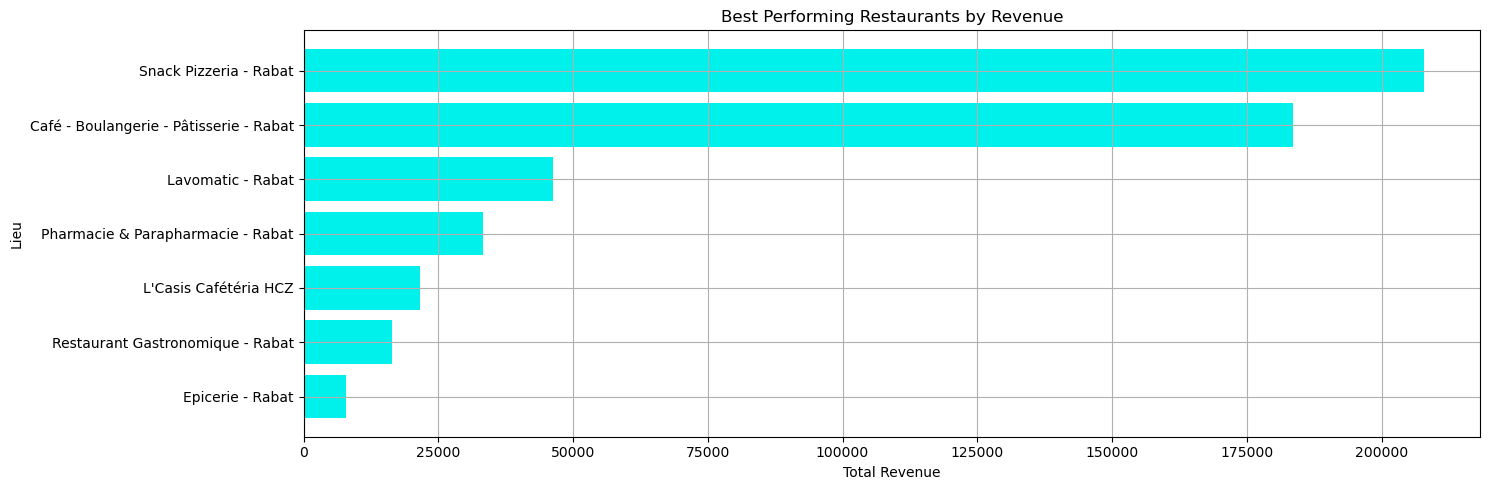

In [131]:
# Create a bar chart for the best performing restaurants
plt.figure(figsize=(15, 5))
plt.barh(top_restaurants['Lieu'], top_restaurants['Revenus_Totaux'], color='#00f0ec')
plt.xlabel('Total Revenue')
plt.ylabel('Lieu')
plt.title('Best Performing Restaurants by Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.grid(True)
plt.tight_layout()
plt.show()

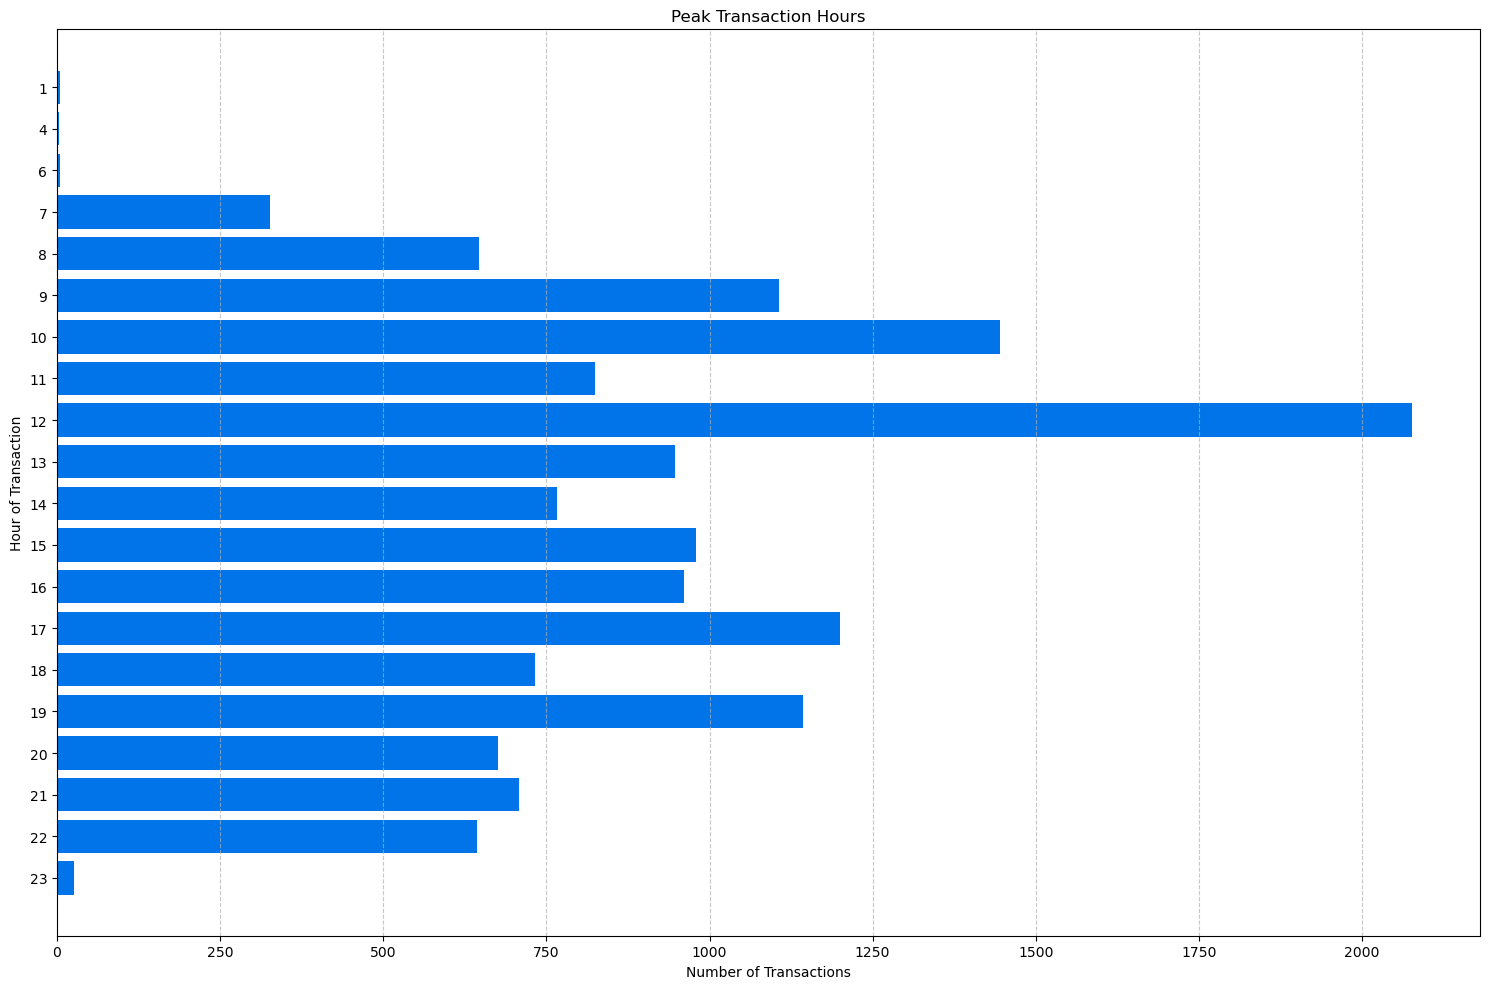

In [110]:
# Create a horizontal bar chart for peak transaction hours
plt.figure(figsize=(15, 10))
plt.barh(peak_hours['hour'].astype(str), peak_hours['Transaction_Count'], color='#0074e8')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Set labels and title
plt.xlabel('Number of Transactions')
plt.ylabel('Hour of Transaction')
plt.title('Peak Transaction Hours')

# Add grid lines for clarity (optional)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Analyse des Heures de Pointe et des Lieux les Plus Performants

- **Graphiques en Barres** : Visualisation des restaurants les plus performants et des heures de pointe.

## Interprétation :

- **Lieux les Plus Performants** :
    
    - Les restaurants les plus performants en termes de chiffre d'affaires indiquent les emplacements stratégiques qui génèrent le plus de trafic. Analyser ces lieux peut permettre de comprendre les caractéristiques spécifiques qui contribuent à leur succès (ex. : emplacement, personnel, promotions locales).

- **Heures de Pointe** :
    
    - Identifier les heures de pointe permet de gérer les ressources (personnel, stocks) de manière optimale. Par exemple, une forte affluence à certaines heures nécessite un nombre suffisant de caissiers pour minimiser les temps d'attente et maximiser l'efficacité.

## Conclusion :

- **Lieux Performants** : Les restaurants avec un fort chiffre d'affaires sont des modèles de bonnes pratiques à répliquer ailleurs.
- **Heures de Pointe** : L’optimisation des ressources pendant les heures de pointe est essentielle pour maintenir la satisfaction client et maximiser les ventes.

## Insight :

- **Optimisation des Lieux** : Identifier les pratiques des lieux performants pour les appliquer aux restaurants moins performants.
- **Gestion des Ressources** : Adapter les équipes et les stocks en fonction des heures de pointe pour maximiser l'efficacité et minimiser les pertes.

6. **Détection des Anomalies (Outliers)** : Détecter les anomalies dans les montants de transactions en utilisant l'IQR.

In [34]:
# Calcul des quartiles
Q1 = df['Montant_Rgl'].quantile(0.25)
Q3 = df['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1
# Détection des anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtrer les anomalies
anomalies = df[(df['Montant_Rgl'] < lower_bound) | (df['Montant_Rgl'] > upper_bound)]

In [35]:
# Grouper les anomalies par client, restaurant et heure
grouped_anomalies = anomalies.groupby(['Bénéficiaire_CPP', 'Restaurant', 'hour']).size().reset_index(name='Count_Anomalies')

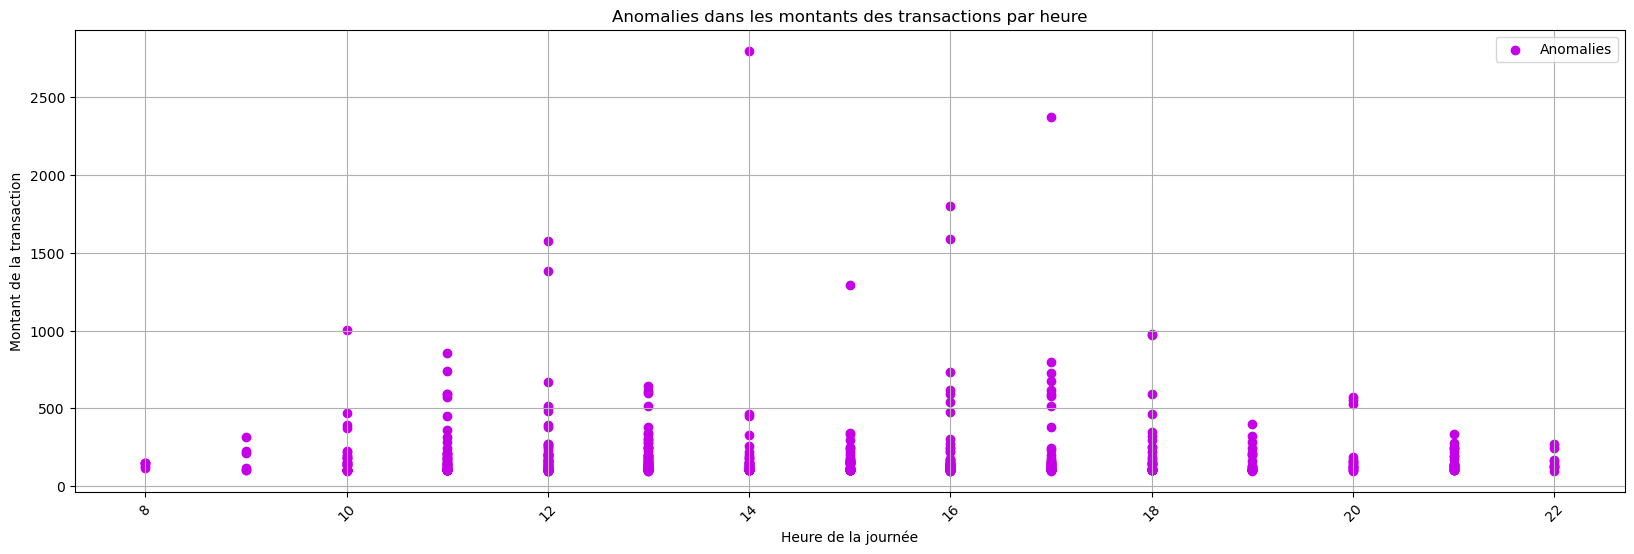

In [108]:
# Scatter plot des anomalies en fonction de l'heure
plt.figure(figsize=(20, 6))
plt.scatter(anomalies['hour'], anomalies['Montant_Rgl'], color='#c500e8', label='Anomalies')
plt.xlabel('Heure de la journée')
plt.ylabel('Montant de la transaction')
plt.title('Anomalies dans les montants des transactions par heure')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

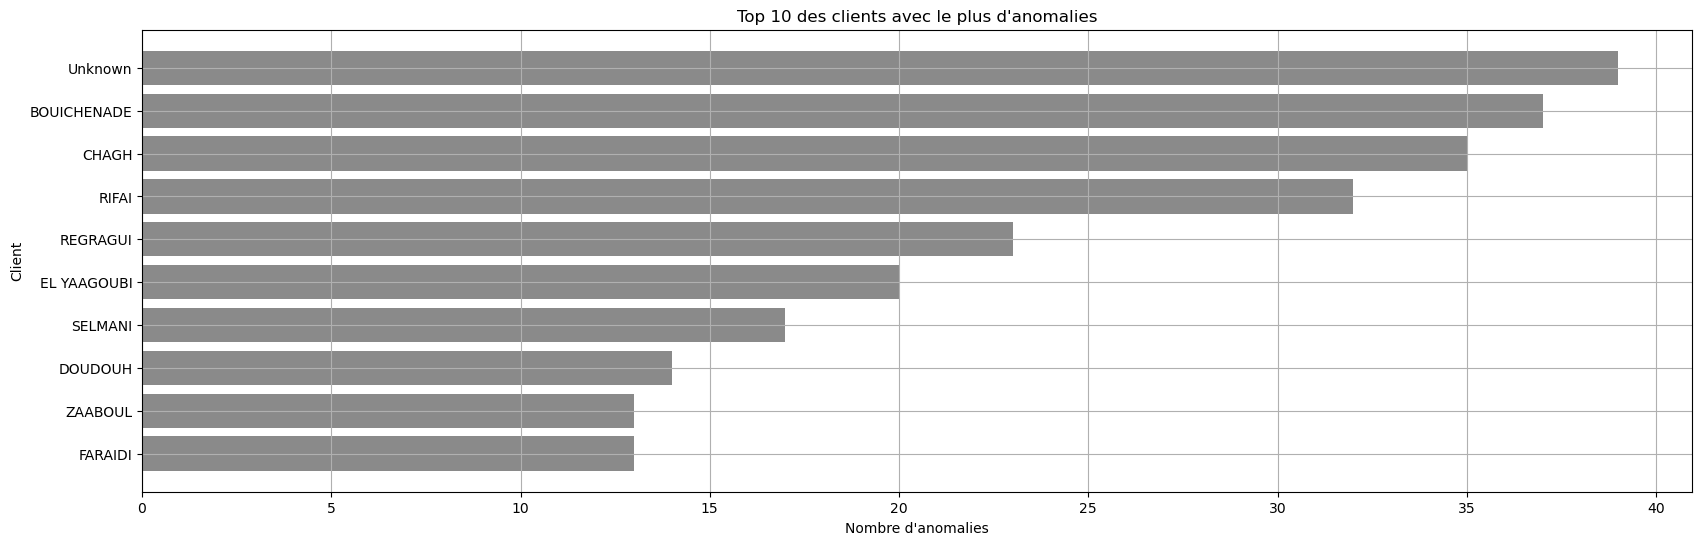

In [106]:
# Créer un graphique en barres pour les clients avec le plus d'anomalies
top_anomalies_by_client = grouped_anomalies.groupby('Bénéficiaire_CPP')['Count_Anomalies'].sum().reset_index().sort_values(by='Count_Anomalies', ascending=False).head(10)

plt.figure(figsize=(20, 6))
plt.barh(top_anomalies_by_client['Bénéficiaire_CPP'], top_anomalies_by_client['Count_Anomalies'], color='#8a8a8a')
plt.xlabel('Nombre d\'anomalies')
plt.ylabel('Client')
plt.title('Top 10 des clients avec le plus d\'anomalies')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

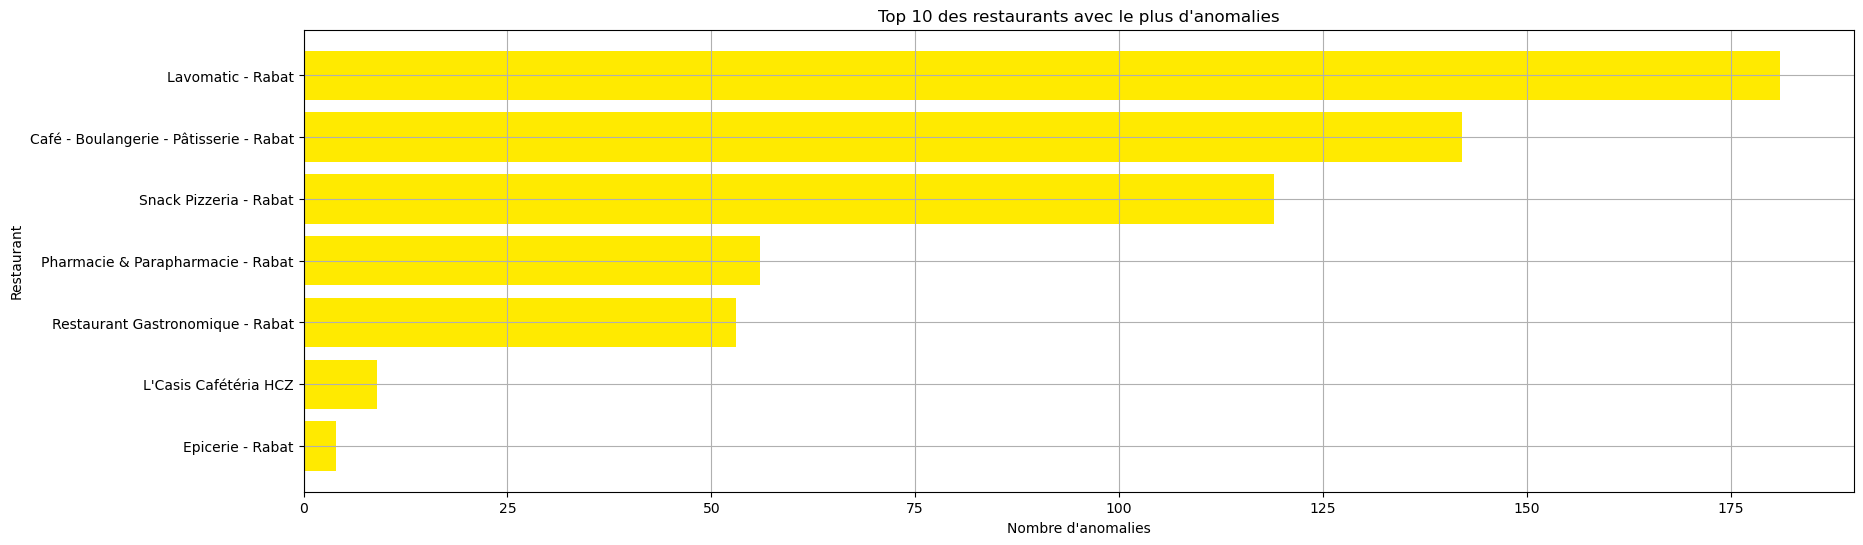

In [127]:
# Créer un graphique en barres pour les restaurants avec le plus d'anomalies
top_anomalies_by_restaurant = grouped_anomalies.groupby('Restaurant')['Count_Anomalies'].sum().reset_index().sort_values(by='Count_Anomalies', ascending=False).head(10)

plt.figure(figsize=(20, 6))
plt.barh(top_anomalies_by_restaurant['Restaurant'], top_anomalies_by_restaurant['Count_Anomalies'], color='#ffea00')
plt.xlabel('Nombre d\'anomalies')
plt.ylabel('Restaurant')
plt.title('Top 10 des restaurants avec le plus d\'anomalies')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# Détection des Anomalies (Outliers)

- **Méthode IQR** : Utilisation de la méthode de l'écart interquartile pour détecter les anomalies dans les montants de transactions (`Montant_Rgl`).

## Interprétation :

- **Anomalies dans les Transactions** :
    - Les transactions avec des montants anormalement élevés ou bas peuvent signaler des erreurs, des fraudes ou des comportements atypiques. En groupant ces anomalies par client, restaurant et heure, on peut détecter des schémas récurrents et comprendre les causes sous-jacentes.

## Conclusion :

- **Anomalies Détectées** : L’identification des outliers permet de mieux comprendre les comportements aberrants ou irréguliers, qu’il s’agisse de fraudes potentielles ou d'erreurs de transaction.

## Insight :

- **Gestion des Risques** : Mener des investigations supplémentaires sur les anomalies peut aider à prévenir les fraudes et à renforcer la sécurité des transactions.


7. **Analyse des Performances des Caissiers** : Analyser le montant total traité et le nombre de transactions par caissier.

In [40]:
# Grouper par caissier pour calculer le montant total traité et le nombre de transactions
performance_caissiers = df.groupby('Prenom User').agg(Montant_Total=('Montant_Rgl', 'sum'), Nombre_Transactions=('Montant_Rgl', 'count')).reset_index()
performance_caissiers.head()

,Prenom User,Montant_Total,Nombre_Transactions
0,Abdelkarim,9759.500000,515
1,Abdelkrim,2975.300006,204
2,Ayman,4582.000000,235
3,Ayoub,38756.000000,797
4,Fadwa,46274.139999,641


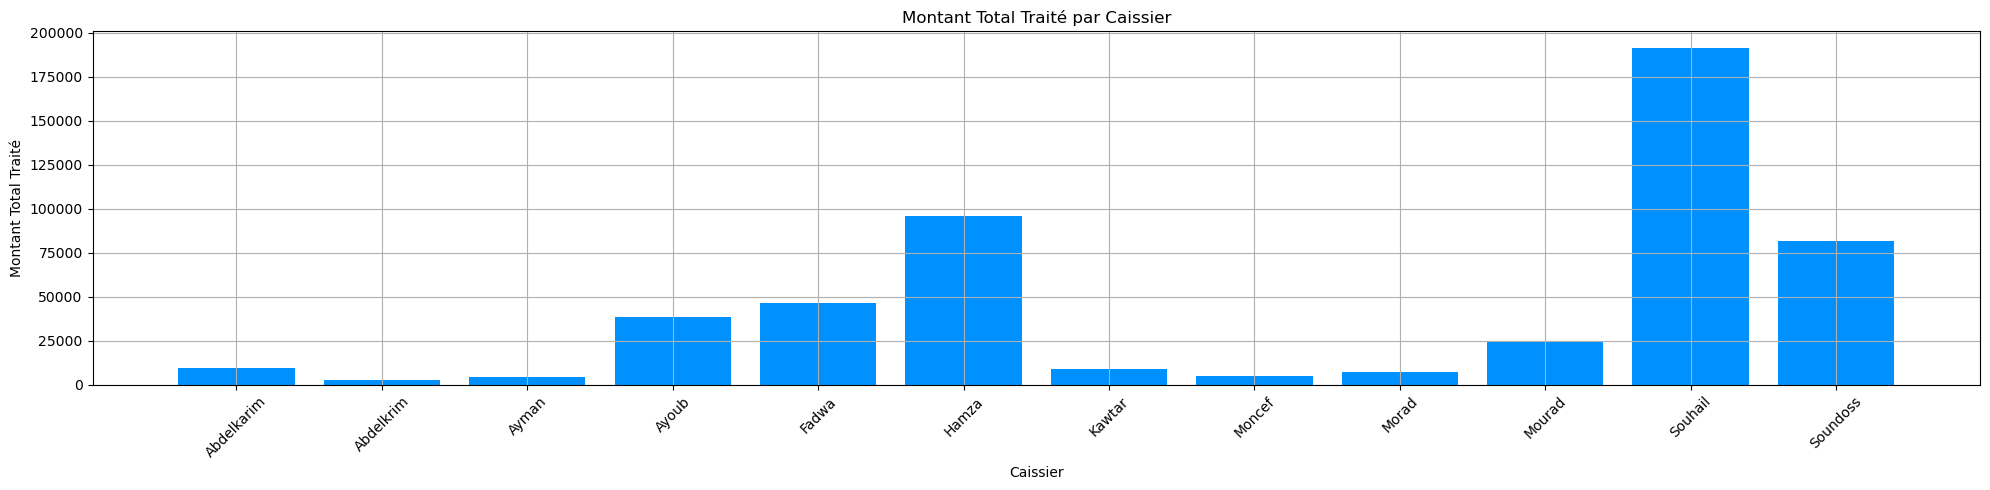

In [133]:
# Graphique en barres pour les montants totaux traités
plt.figure(figsize=(20,5))
plt.bar(performance_caissiers['Prenom User'], performance_caissiers['Montant_Total'], color='#0091ff')
plt.title('Montant Total Traité par Caissier')
plt.xlabel('Caissier')
plt.ylabel('Montant Total Traité')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

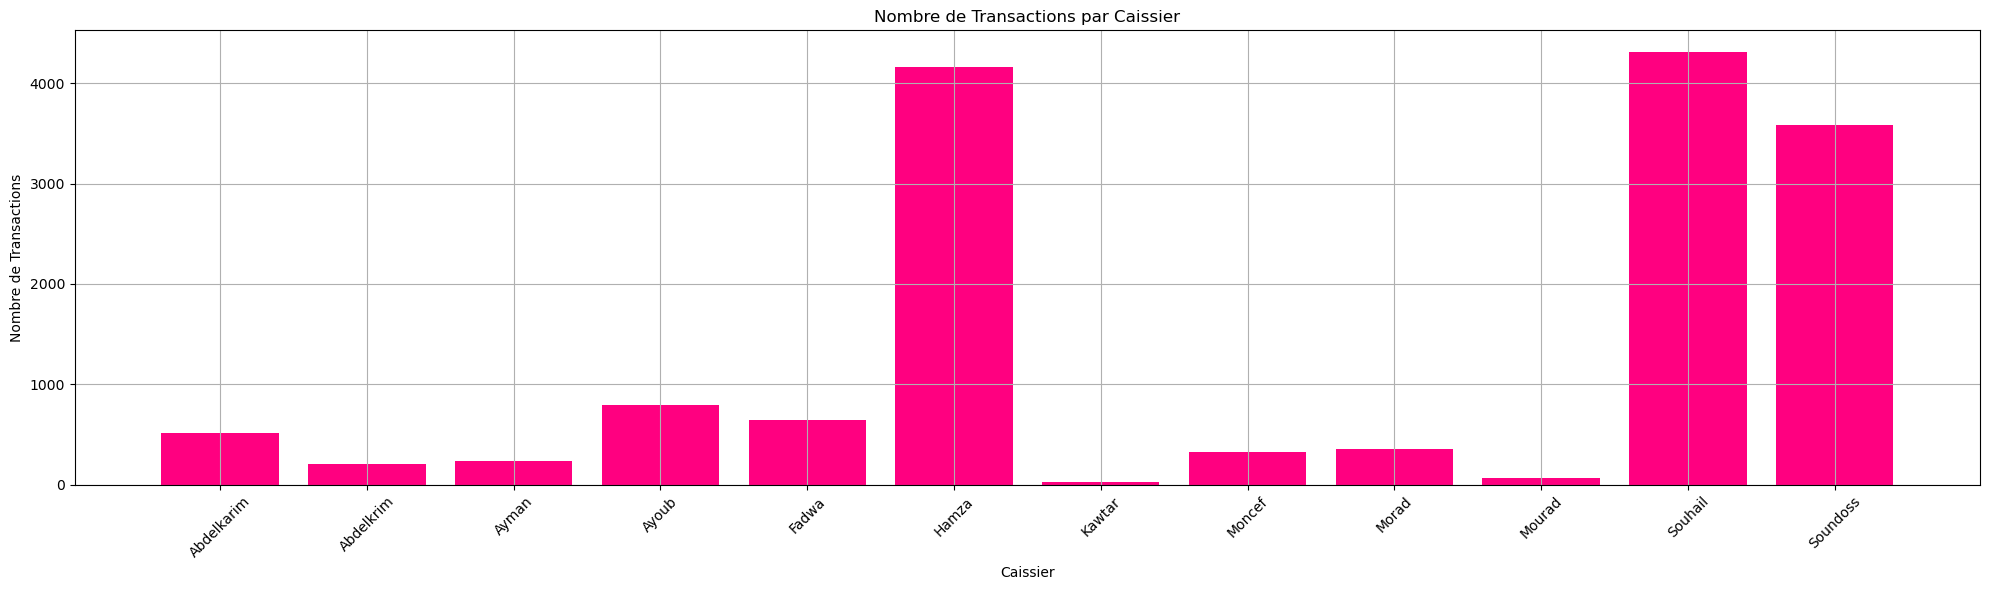

In [98]:
# Graphique en barres pour le nombre de transactions effectuées
plt.figure(figsize=(20,6))
plt.bar(performance_caissiers['Prenom User'], performance_caissiers['Nombre_Transactions'], color='#ff0080')
plt.title('Nombre de Transactions par Caissier')
plt.xlabel('Caissier')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Analyse des Performances des Caissiers

- **Graphiques en Barres** : Visualisation des montants totaux traités et des nombres de transactions par caissier.

## Interprétation :

- **Performances des Caissiers** :
    - Les caissiers qui traitent des montants importants ou un grand nombre de transactions peuvent être identifiés comme des employés clés. Cependant, une analyse plus poussée est nécessaire pour s’assurer que ces volumes de transactions sont bien gérés (temps de traitement, satisfaction client, etc.).

## Conclusion :

- **Meilleurs Performants** : Identifier les caissiers performants permet de reconnaître leurs contributions et de définir des objectifs réalistes pour les autres membres de l’équipe.

## Insight :

- **Formation et Récompense** : Offrir des formations continues aux caissiers et mettre en place des systèmes de récompense pour stimuler les performances.


8. **Analyse de la Corrélation entre le Solde des Cartes Prépayées et les Dépenses des Clients** : Étudier la relation entre les soldes des cartes et les dépenses totales des clients.

In [44]:
# Grouper les données par client pour obtenir le solde moyen et les dépenses totales
correlation_data = df.groupby('Bénéficiaire_CPP').agg(Solde_Moyen=('Solde_CPP', 'mean'), Depenses_Totales=('Montant_Rgl', 'sum')).reset_index()
correlation_data.head()

,Bénéficiaire_CPP,Solde_Moyen,Depenses_Totales
0,AABID,72.900000,259.500000
1,AABIL,1055.187273,2824.900002
2,AARAB,848.883929,7205.000000
3,AARIBECHE,14.500000,28.000000
4,AAYLA,114.261250,184.625000


In [45]:
# Calculer la corrélation entre le solde moyen et les dépenses totales
correlation = correlation_data['Solde_Moyen'].corr(correlation_data['Depenses_Totales'])
print(f"Le coefficient de corrélation entre le solde des cartes et les dépenses totales est : {correlation}")

Le coefficient de corrélation entre le solde des cartes et les dépenses totales est : 0.3171544091094249


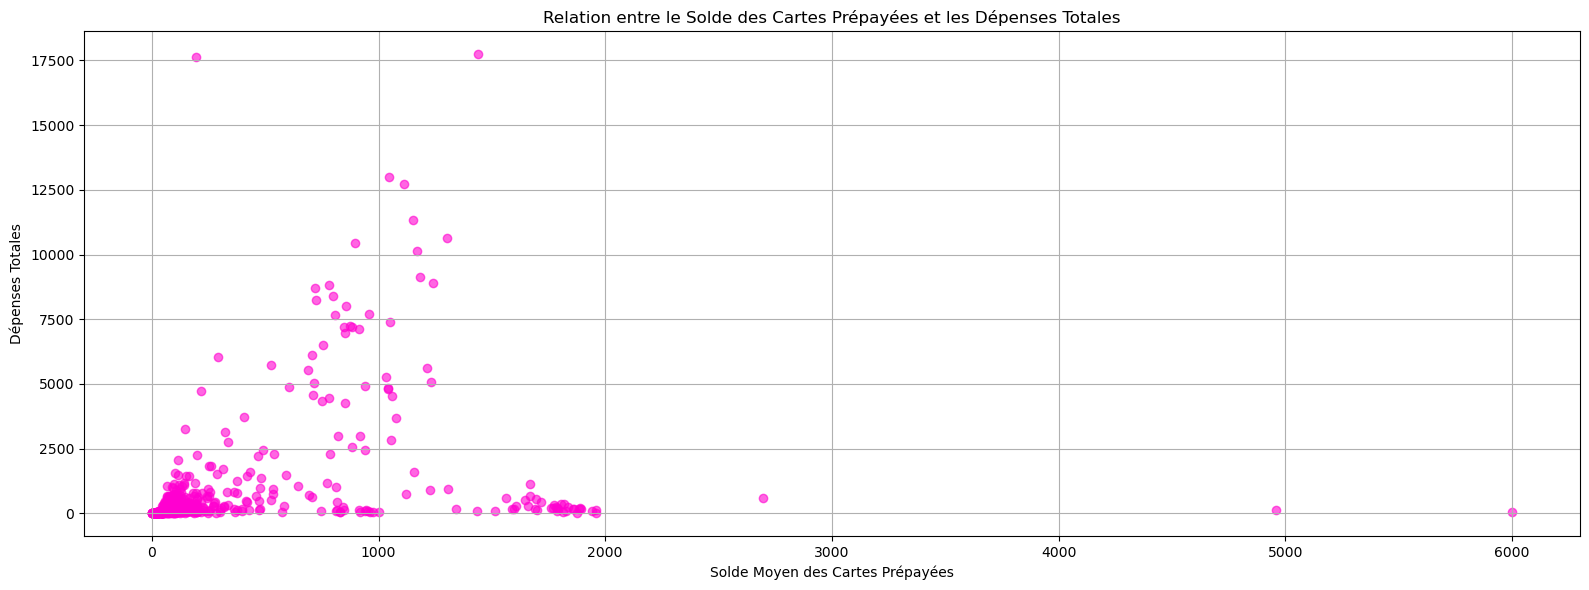

In [102]:
# Scatter plot pour visualiser la relation entre le solde et les dépenses
plt.figure(figsize=(16, 6))
plt.scatter(correlation_data['Solde_Moyen'], correlation_data['Depenses_Totales'], color='#ff00d0', alpha=0.6)
plt.title('Relation entre le Solde des Cartes Prépayées et les Dépenses Totales')
plt.xlabel('Solde Moyen des Cartes Prépayées')
plt.ylabel('Dépenses Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyse de la Relation entre le Solde des Cartes Prépayées et les Dépenses des Clients

- **Corrélation** : Calcul de la corrélation entre le solde des cartes prépayées (`Solde_CPP`) et les dépenses totales (`Montant_Rgl`) pour chaque client.
- **Graphique en Nuage de Points (Scatter Plot)** : Visualisation de la relation entre les soldes des cartes prépayées et les dépenses des clients.

## Interprétation :

- **Corrélation Positive** : Une forte corrélation positive entre le solde des cartes prépayées et les dépenses indique que les clients avec des soldes élevés sont des utilisateurs réguliers de la carte, et il est essentiel de les fidéliser avec des programmes de rechargement ou des avantages spécifiques.
    
- **Corrélation Négative ou Faible** : Si la corrélation est faible, cela peut indiquer que la carte prépayée n’est pas encore perçue comme un outil de gestion à long terme par certains clients, suggérant des opportunités pour encourager une utilisation plus fréquente.

## Insight :

- **Encourager l'Usage des Cartes Prépayées** : Si une corrélation positive est identifiée, l'entreprise peut mettre en place des stratégies pour inciter les clients à recharger leurs cartes plus fréquemment, par exemple en offrant des bonus sur les rechargements. Si la corrélation est faible, une campagne d'éducation ou des offres incitatives pourraient stimuler leur utilisation.
    
- **Personnalisation des Offres** : En fonction du solde moyen et des habitudes de dépenses des clients, il est possible de personnaliser les offres et les promotions pour maximiser l’engagement et les ventes via la carte prépayée.


# **Conclusion**

Cette analyse a révélé des tendances clés :

1. **Tendances des Transactions** : Les pics saisonniers indiquent l'impact des campagnes marketing et des événements.
   
2. **Tendances des Cartes Prépayées** : Les soldes évolutifs aident à anticiper les besoins des clients.
   
3. **Comportement des Clients** : Identifier les gros dépensiers permet de mieux cibler les promotions.

4. **Montants Restants et Soldes à Zéro** : La détection des soldes impayés priorise les efforts de recouvrement.

5. **Heures de Pointe et Lieux Performants** : Analyse des performances pour optimiser les ressources.

6. **Détection des Anomalies** : L'IQR révèle des comportements atypiques à surveiller.

7. **Performances des Caissiers** : L'évaluation des caissiers permet d'identifier les plus performants.

8. **Corrélation entre Solde et Dépenses** : Une corrélation de 0.317 indique un lien modéré, suggérant d'autres facteurs à considérer.

Ces insights guident des recommandations pour optimiser les opérations et améliorer l'expérience client.